# Loading the data of schools

In [2]:
# Import the pandas library.

import pandas as pd
import csv
import numpy as np
import pandas as pd
#raw_data= pd.read_excel('schools_data.xlsx',sheet_name=2)

In [3]:
raw_data

NameError: name 'raw_data' is not defined

# Data for schools near City of Lucknow
---->location coordinates were added using Batchgeo.com

In [4]:

print('reading schools')

# Read in the airports data.
schools = pd.read_csv('data.csv', header=None, dtype=str, skiprows=1)#("C:/Users/lyubo/Documents/DATA_networks/mobilitydata/openflights/airports.dat", header=None, dtype=str)
#airlines = pandas.read_csv('data_airports/airlines.dat', header=None, dtype=str)
#routes = pandas.read_csv('data_airports/routes.dat', header=None, dtype=str)


schools.columns = ["id", "city", "name", "latitude", "longitude", "altitude", "total_boys", "total_girls", "total_enrollment", "teachers_male", "teachers_female", "total_teachers","total_classrooms","total_para"]

print("data loading finished")
schools.head()
schools=schools.dropna()
schools[["latitude", "longitude", "altitude", "total_boys", "total_girls", "total_enrollment", "teachers_male", "teachers_female", "total_teachers","total_classrooms","total_para"]] = schools[["latitude", "longitude", "altitude", "total_boys", "total_girls", "total_enrollment", "teachers_male", "teachers_female", "total_teachers","total_classrooms","total_para"]].apply(pd.to_numeric)


reading schools
data loading finished


In [5]:
schools.dtypes

id                   object
city                 object
name                 object
latitude            float64
longitude           float64
altitude              int64
total_boys            int64
total_girls           int64
total_enrollment      int64
teachers_male         int64
teachers_female       int64
total_teachers        int64
total_classrooms      int64
total_para            int64
dtype: object

# Calculating Distance of the school from Education office in City

In [6]:
import math
from math import sin, cos, sqrt, atan2, radians

In [7]:
def distance(x,y):
    
    lat1, lon1 = (y,x)
    lat2, lon2 = (26.865262,80.955585)
    radius = 6371 # km

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c


    return d
    



In [8]:
print(schools["latitude"])


0      80.925267
1      80.925267
2      80.906947
3      80.916626
4      80.883563
         ...    
950    80.795907
951    78.568459
952    81.005673
953    80.951180
954    80.357513
Name: latitude, Length: 955, dtype: float64


In [9]:
schools["dist_from_city"]=0
for i in range(len(schools['latitude'])):
        schools["dist_from_city"][i]= distance(schools["latitude"][i],schools["longitude"][i])



C:\Users\Mathias\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
schools

,id,city,name,latitude,longitude,altitude,total_boys,total_girls,total_enrollment,teachers_male,teachers_female,total_teachers,total_classrooms,total_para,dist_from_city
0,#0,LUCKNOW,P.S. AMANI GANJ-1 BANAUGA LUCKNOW,80.925267,27.139951,0,58,57,115,1,3,4,8,2,30
1,#0,LUCKNOW,P.S. AMANI GANJ-2 BANAUGA LUCKNOW,80.925267,27.139951,0,86,85,171,2,4,6,4,2,30
2,#0,LUCKNOW,PS ARAMBA ARAMBA LUCKNOW,80.906947,27.134025,0,69,100,169,3,3,6,7,2,30
3,#0,LUCKNOW,PS BHAGAUTIPUR BHAGAUTIPUR LUCKNOW,80.916626,27.127364,0,27,24,51,0,3,3,6,1,29
4,#0,LUCKNOW,PS GOHNA KHURD GOHNA KHURD LUCKNOW,80.883563,27.014063,0,14,8,22,2,1,3,5,1,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,#0,LUCKNOW,JHS PIPERSAND PIPERSAND LUCKNOW,80.795907,26.778645,0,63,73,136,2,6,8,4,0,18
951,#0,LUCKNOW,JHS BAGIYAMAU BAGIYAMAU LUCKNOW,78.568459,25.448426,0,72,56,128,2,5,7,5,2,285
952,#0,LUCKNOW,JHS HASANPUR KHEWALI HASANPUR KHEVALI LUCKNOW,81.005673,26.786533,0,37,57,94,1,4,5,5,0,10
953,#0,LUCKNOW,JHS KANYA KRM ARJUNGANJ ARJUN GANJ LUCKNOW,80.951180,26.872990,0,79,68,147,3,5,8,6,2,0


In [11]:
schools['ratio_s2t']=schools['total_enrollment']/(schools['total_teachers'])
schools['ratio_s2C']=schools['total_enrollment']/(schools['total_classrooms'])
schools['ratio_g2b']=schools['total_girls']/(schools['total_boys'])


In [12]:
schools=schools.drop(columns=['id','altitude','total_para'])

In [13]:
schools

,city,name,latitude,longitude,total_boys,total_girls,total_enrollment,teachers_male,teachers_female,total_teachers,total_classrooms,dist_from_city,ratio_s2t,ratio_s2C,ratio_g2b
0,LUCKNOW,P.S. AMANI GANJ-1 BANAUGA LUCKNOW,80.925267,27.139951,58,57,115,1,3,4,8,30,28.750000,14.375000,0.982759
1,LUCKNOW,P.S. AMANI GANJ-2 BANAUGA LUCKNOW,80.925267,27.139951,86,85,171,2,4,6,4,30,28.500000,42.750000,0.988372
2,LUCKNOW,PS ARAMBA ARAMBA LUCKNOW,80.906947,27.134025,69,100,169,3,3,6,7,30,28.166667,24.142857,1.449275
3,LUCKNOW,PS BHAGAUTIPUR BHAGAUTIPUR LUCKNOW,80.916626,27.127364,27,24,51,0,3,3,6,29,17.000000,8.500000,0.888889
4,LUCKNOW,PS GOHNA KHURD GOHNA KHURD LUCKNOW,80.883563,27.014063,14,8,22,2,1,3,5,18,7.333333,4.400000,0.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,LUCKNOW,JHS PIPERSAND PIPERSAND LUCKNOW,80.795907,26.778645,63,73,136,2,6,8,4,18,17.000000,34.000000,1.158730
951,LUCKNOW,JHS BAGIYAMAU BAGIYAMAU LUCKNOW,78.568459,25.448426,72,56,128,2,5,7,5,285,18.285714,25.600000,0.777778
952,LUCKNOW,JHS HASANPUR KHEWALI HASANPUR KHEVALI LUCKNOW,81.005673,26.786533,37,57,94,1,4,5,5,10,18.800000,18.800000,1.540541
953,LUCKNOW,JHS KANYA KRM ARJUNGANJ ARJUN GANJ LUCKNOW,80.951180,26.872990,79,68,147,3,5,8,6,0,18.375000,24.500000,0.860759


In [14]:
schools1 = pd.read_csv('data.csv')
schools1.columns = ["id", "city", "name", "latitude", "longitude", "altitude", "total_boys", "total_girls", "total_enrollment", "teachers_male", "teachers_female", "total_teachers","total_classrooms","total_para"]

print("data loading finished")
schools1.head()
schools1=schools1.dropna()
schools1[["latitude", "longitude", "altitude", "total_boys", "total_girls", "total_enrollment", "teachers_male", "teachers_female", "total_teachers","total_classrooms","total_para"]] = schools1[["latitude", "longitude", "altitude", "total_boys", "total_girls", "total_enrollment", "teachers_male", "teachers_female", "total_teachers","total_classrooms","total_para"]].apply(pd.to_numeric)


data loading finished


In [15]:
schools1=schools1.drop(columns=["id","city","altitude", "total_boys", "total_girls", "total_enrollment", "teachers_male", "teachers_female", "total_teachers","total_classrooms","total_para"])
schools1

,name,latitude,longitude
0,P.S. AMANI GANJ-1 BANAUGA LUCKNOW,80.925267,27.139951
1,P.S. AMANI GANJ-2 BANAUGA LUCKNOW,80.925267,27.139951
2,PS ARAMBA ARAMBA LUCKNOW,80.906947,27.134025
3,PS BHAGAUTIPUR BHAGAUTIPUR LUCKNOW,80.916626,27.127364
4,PS GOHNA KHURD GOHNA KHURD LUCKNOW,80.883563,27.014063
...,...,...,...
950,JHS PIPERSAND PIPERSAND LUCKNOW,80.795907,26.778645
951,JHS BAGIYAMAU BAGIYAMAU LUCKNOW,78.568459,25.448426
952,JHS HASANPUR KHEWALI HASANPUR KHEVALI LUCKNOW,81.005673,26.786533
953,JHS KANYA KRM ARJUNGANJ ARJUN GANJ LUCKNOW,80.951180,26.872990


In [16]:
import math
from math import sin, cos, sqrt, atan2, radians

def distance1(x,y,a,b):
    
    lat1, lon1 = (y,x)
    radius = 6371 # km
    
    lat2, lon2 = (a,b)

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
            * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c
#     empty.append(d)
    return d


In [18]:
col=[i for i in range(len(schools1['latitude']))]
df = pd.DataFrame(columns=col)
dist = []
for i in range(len(schools1['latitude'])):
    a = schools1["latitude"][i]
    b = schools1["longitude"][i]
    for j in range(len(schools1['latitude'])):
        dist.append(distance1(schools1["longitude"][j],schools1["latitude"][j], a, b))
    df = pd.concat([df, pd.DataFrame([dist])])

In [19]:
df

,0,1,2,3,4,5,6,7,8,9,...,912015,912016,912017,912018,912019,912020,912021,912022,912023,912024
0,0.0,0.0,2.039702,0.985869,5.138151,42.134767,18.101252,5.742672,5.742672,6.371438,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.0,0.0,2.039702,0.985869,5.138151,42.134767,18.101252,5.742672,5.742672,6.371438,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.0,0.0,2.039702,0.985869,5.138151,42.134767,18.101252,5.742672,5.742672,6.371438,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.0,0.0,2.039702,0.985869,5.138151,42.134767,18.101252,5.742672,5.742672,6.371438,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.0,0.0,2.039702,0.985869,5.138151,42.134767,18.101252,5.742672,5.742672,6.371438,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.0,0.0,2.039702,0.985869,5.138151,42.134767,18.101252,5.742672,5.742672,6.371438,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.0,0.0,2.039702,0.985869,5.138151,42.134767,18.101252,5.742672,5.742672,6.371438,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.0,0.0,2.039702,0.985869,5.138151,42.134767,18.101252,5.742672,5.742672,6.371438,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.0,0.0,2.039702,0.985869,5.138151,42.134767,18.101252,5.742672,5.742672,6.371438,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
print(df.iloc[2,1910:2865])

1910      2.039702
1911      2.039702
1912      0.000000
1913      1.082573
1914      3.349084
           ...    
2860     13.853684
2861    262.135741
2862     12.545886
2863      6.718034
2864     72.018311
Name: 0, Length: 955, dtype: float64


In [46]:
df_t= pd.DataFrame()

In [47]:
df_t

""


In [50]:
l=[]
for i in range(955):
    a=i*955
    b=955*(i+1)+1
    l=df.iloc[i,a:b]
    df_t=df_t.append(l)

KeyboardInterrupt: 

In [49]:
df_t

""


In [54]:
df2=np.array(df.iloc[954,0:])

In [57]:
B = np.reshape(df2, (-1, 955))

array([ 0.        ,  0.        ,  2.03970185, ..., 78.72554731,
       73.95002591,  0.        ])

In [58]:
print(B)

[[ 0.          0.          2.03970185 ... 10.86356645  5.49191855
  73.78995918]
 [ 0.          0.          2.03970185 ... 10.86356645  5.49191855
  73.78995918]
 [ 2.03970185  2.03970185  0.         ... 12.54588612  6.71803411
  72.01831084]
 ...
 [10.86356645 10.86356645 12.54588612 ...  0.          6.24401396
  78.72554731]
 [ 5.49191855  5.49191855  6.71803411 ...  6.24401396  0.
  73.95002591]
 [73.78995918 73.78995918 72.01831084 ... 78.72554731 73.95002591
   0.        ]]


In [59]:
df3= pd.DataFrame(B)

In [60]:
df3

,0,1,2,3,4,5,6,7,8,9,...,945,946,947,948,949,950,951,952,953,954
0,0.000000,0.000000,2.039702,0.985869,5.138151,42.134767,18.101252,5.742672,5.742672,6.371438,...,5.638428,13.769356,4.697361,4.697361,8.862853,15.736055,264.167026,10.863566,5.491919,73.789959
1,0.000000,0.000000,2.039702,0.985869,5.138151,42.134767,18.101252,5.742672,5.742672,6.371438,...,5.638428,13.769356,4.697361,4.697361,8.862853,15.736055,264.167026,10.863566,5.491919,73.789959
2,2.039702,2.039702,0.000000,1.082573,3.349084,43.968959,16.152674,7.583456,7.583456,8.279802,...,6.663629,11.942936,5.871689,5.871689,7.080614,13.853684,262.135741,12.545886,6.718034,72.018311
3,0.985869,0.985869,1.082573,0.000000,4.181655,42.930608,17.121450,6.532392,6.532392,7.212197,...,5.914948,12.817054,5.050666,5.050666,7.918191,14.770028,263.184682,11.553798,5.884509,72.860144
4,5.138151,5.138151,3.349084,4.181655,0.000000,45.658946,13.008237,9.773157,9.773157,10.592129,...,7.555969,8.635399,7.132592,7.132592,3.742160,10.600414,259.270150,14.149780,7.915922,68.689126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,15.736055,15.736055,13.853684,14.770028,10.600414,53.992001,2.780726,19.872086,19.872086,20.744062,...,16.751109,2.141938,16.758549,16.758549,6.936462,0.000000,249.077394,23.325294,17.345561,58.254841
951,264.167026,264.167026,262.135741,263.184682,259.270150,300.821626,246.424014,268.903525,268.903525,269.763224,...,265.811281,251.212020,265.834579,265.834579,255.885623,249.077394,0.000000,272.268750,266.418768,199.117582
952,10.863566,10.863566,12.545886,11.553798,14.149780,31.530601,26.061260,5.231551,5.231551,4.908997,...,6.699518,21.184355,7.017855,7.017855,16.845084,23.325294,272.268750,0.000000,6.244014,78.725547
953,5.491919,5.491919,6.718034,5.884509,7.915922,37.743725,20.033131,3.064052,3.064052,3.898376,...,0.722803,15.208061,0.848090,0.848090,10.679060,17.345561,266.418768,6.244014,0.000000,73.950026


In [62]:
df3.to_excel("output1.xlsx",sheet_name='Sheet_name_1')

In [126]:
# routes will be our links in the travel network
#routes.head(5)

In [127]:
#to ensure numerical data for routes: data cleaning for making ONLY numerical values
#routes = routes[routes["airline_id"] != "\\N"]


## Visualisation of a network
We first plot just nodes of a network, airports. This is good to do if the network is messy to be sure that everything is fine.

First we define $x$ as ids of airports:
    #name_lengths = airlines["name"].apply(lambda x: len(str(x)))
    #plt.scatter(airlines["id"].astype(int), name_lengths)



In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.cm as cm
import folium

# function to visualise trajectories on a map

def visualise_df_traj(df, lat_values, lon_values):
    ''' function to visusalise trajectories on a map
    input:
    lat_values = df.latitude.values
    lon_values = df.longitude.values'''
   
    latitude = df.lat.values
    longitude = df.lon.values

    #then we zip two arrays of lat, lon of datapoints
    latlon1 = list(zip(latitude, longitude))


    #We put map to show first location of Paris 48.8566° North, 2.3522° est
    mapit = folium.Map( location=[48.75 , 2.35], zoom_start=6 )
    for coord in latlon1:
        folium.Marker( location=[ coord[0], coord[1] ], fill_color='#43d9de', radius=8 ).add_to( mapit )
    mapit


    #draw connecting line between locations written in latlon file

    trips = df.tripid # different trips
    array_trip = np.unique(trips)


    #for ind, c in zip(ind_len, colors):    
    for ind in range(len(array_trip)):
        df_trip = df[df.tripid == array_trip[ind]]
        shape =df_trip.shape
   
        latitude1 = df_trip.latitudestart.values
        longitude1 = df_trip.longitudestart.values

        #then we zip two arrays of lat, lon of datapoints
        latlon1 = list(zip(latitude1, longitude1))

   
        size = shape[0]
    SAF=folium.PolyLine(locations=latlon1,weight=5,color = 'r')#color_array[ind])
    mapit.add_child(SAF)
    #plt.show()

In [110]:

#data = pandas.DataFrame({"lengths": name_lengths, "ids": airlines["id"].astype(int)})
#seaborn.jointplot(x="ids", y="lengths", data=data)

# using latitude and longitude pairs for airports. The first map we can make is one that shows all the airports all over the world. We can do this with the basemap extension to matplotlib. This enables drawing world maps and adding points, and is very customizable.

# Import the basemap package
from mpl_toolkits.basemap import Basemap

# For figure use mercator projection, and showing the whole world.
fig, ax = plt.subplots(figsize=(100, 100))

m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
# Draw coastlines, and the edges of the map.

# plot the whole world
#ax2 = world.plot( figsize=(8,4), edgecolor=u'gray', cmap='Set2' )

# or plot Africa continent
#ax2 = world[world.continent == 'Africa'].plot(figsize=(8,8), edgecolor=u'gray', cmap='Pastel1')


m.drawcoastlines()
m.drawmapboundary()

# Convert latitude and longitude to x and y coordinates
x, y = m(list(airports["longitude"].astype(float)), list(airports["latitude"].astype(float)))

# Use matplotlib to draw the points onto the map.
m.scatter(x,y,1,marker='o',color='red')
# Show the plot.
plt.show()


ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [114]:
# Make a base map with a mercator projection.
# Now we can draw lines and connections
from mpl_toolkits.basemap import Basemap


fig, ax = plt.subplots(figsize=(100, 100))

m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
m.drawcoastlines()
# Iterate through the first 3000 rows.
for name, row in routes[:3000].iterrows():
    try:
        # Get the source and dest airports.
        source = airports[airports["id"] == row["source_id"]].iloc[0]
        dest = airports[airports["id"] == row["dest_id"]].iloc[0]
        # Don't draw overly long routes.
        # Or draw if we put it as 1000 !!!!! 
        
        if abs(float(source["longitude"]) - float(dest["longitude"])) < 2000:
            # Draw a great circle between source and dest airports.
            m.drawgreatcircle(float(source["longitude"]), float(source["latitude"]), float(dest["longitude"]), float(dest["latitude"]),linewidth=1,color='b')
    except (ValueError, IndexError):
        pass
# Show the map.
#plt.figure(figsize=(50,50))    
    
plt.show()


ModuleNotFoundError: No module named 'mpl_toolkits.basemap'



## Statistics of trips 
Here we can count the length of routes (links in our network). 
This can tell us if airlines fly more shorter routes, or more longer ones. 


In [3]:

import math
import matplotlib.pyplot as plt
import seaborn

# calculation may take some time


def haversine(lon1, lat1, lon2, lat2):
    # Convert coordinates to floats.
    lon1, lat1, lon2, lat2 = [float(lon1), float(lat1), float(lon2), float(lat2)]
    # Convert to radians from degrees.
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])
    # Compute distance.
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a))
    km = 6367 * c
    return km

# function copied from https://www.dataquest.io/blog/python-data-visualization-libraries/

def calc_dist(row):
    dist = 0
    try:
        # Match source and destination to get coordinates.
        source = airports[airports["id"] == row["source_id"]].iloc[0]
        dest = airports[airports["id"] == row["dest_id"]].iloc[0]
        # Use coordinates to compute distance.
        dist = haversine(dest["longitude"], dest["latitude"], source["longitude"], source["latitude"])
    except (ValueError, IndexError):
        pass
    return dist


# now we apply this function to routes dataframe
route_lengths = routes.apply(calc_dist, axis=1)





<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

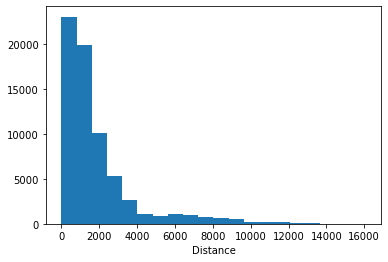

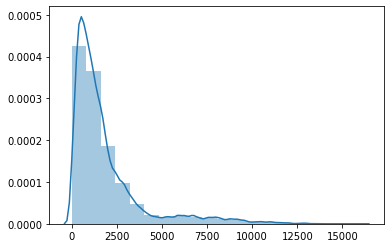

In [4]:
# now we are plotting the histogram 
plt.hist(route_lengths, bins=20)
plt.xlabel('Distance')
plt.show()

seaborn.distplot(route_lengths, bins=20)
plt.show()

# Influence of spatial constraints on centralities 

Spatial  constraints  also  induce  large  betweennesscentrality fluctuations. While hubs are usually verycentral, when space is important central nodes tendto get closer to the gravity center of all points. 

In order to test this we are going to apply algorithms for the **train network.**

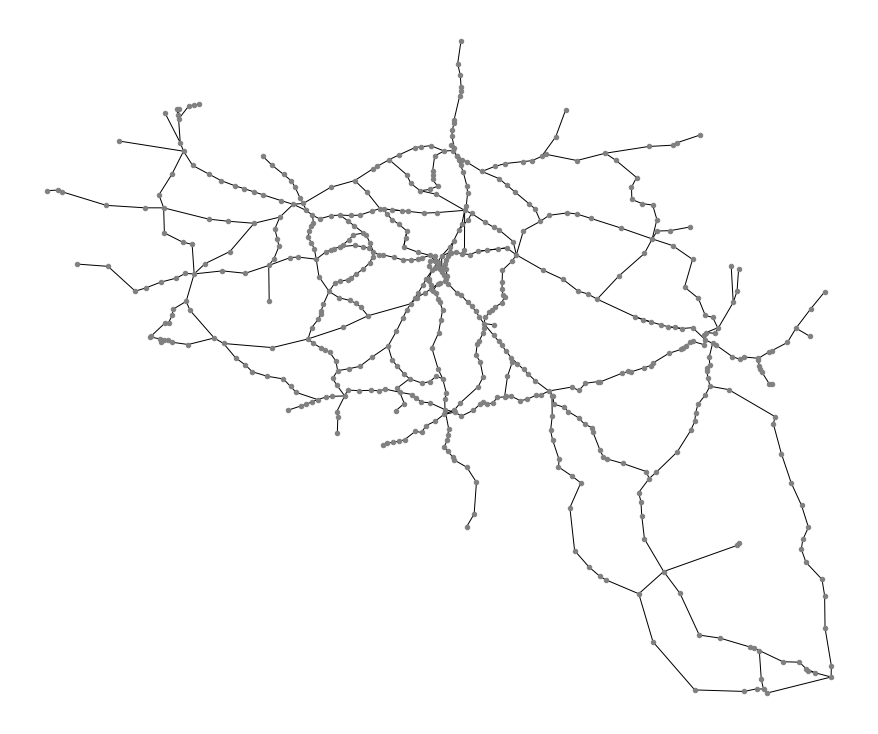

In [6]:
import json
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from itertools import islice, cycle, permutations
import time
from IPython.display import clear_output
import pickle
import multiprocessing as mp
from copy import deepcopy
import random
import itertools
import warnings
import sys
import re
import pandas as pd
from datetime import datetime, timedelta
import os
from pprint import pprint


graphml_path = "data_trains/train_network_LCC.graphml"
g_geo = nx.read_graphml(graphml_path)

# g_cc 
g_cc = deepcopy(g_geo)
zero_degree = []
for u in g_cc.nodes(): # loop through nodes of a graph
#     if g_cc.node[u]["name"] not in city_names_fr and g_cc.node[u]["name"] not in city_names_nl:
#         print(g_cc.node[u]["name"])
    if g_cc.degree(u) ==0:
        zero_degree.append(u)
g_cc.remove_nodes_from(zero_degree)


# draw the network as a graph
warnings.filterwarnings("ignore")
def get_geo_position(g_geo):
    pos = {}
    for u in g_geo.nodes():
        pos[u] = [g_geo.node[u]["lon"], g_geo.node[u]["lat"]]
    return pos

fig = plt.figure(figsize=(12,10), facecolor="black")
pos = get_geo_position(g_geo)
nx.draw(g_geo, pos, node_color='grey', node_size=20)
plt.show()



In [ ]:

# 1. load network data with adjacency matrix 

matrix = np.loadtxt('data_trains/Belgiummatr.txt')
G = nx.from_numpy_matrix(matrix)

# 2. apply network measures to G graph 
# apply notebook network_measures.ipynb

## Mobility data on a network 

We can also analyze and visualise mobility data on a network. We can take open data:
    1. USA taxi data https://github.com/brianbader/nyc_taxi
    2. SCNF train data https://github.com/Liyubov/tidytuesday/tree/master/data/2019/2019-02-26 
    
Feel free to find your favourite dataset.